<a href="https://colab.research.google.com/github/LonelyFriday/datamining_chula/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd
%cd '/content/drive/MyDrive/dataMining/knn'

/content/drive/MyDrive/dataMining/knn
/content/drive/MyDrive/dataMining/knn


#Data Preprocessing

In [ ]:
# import library
import pandas as pd

In [ ]:
# load data
df = pd.read_csv('dataset_kNN.csv')

# drop non-value feature
df.drop(['id'], axis=1, inplace=True)
df

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [ ]:
# is there any missing data
df.isnull().sum()

clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64

In [ ]:
# check type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   clump_thickness    699 non-null    int64 
 1   size_uniformity    699 non-null    int64 
 2   shape_uniformity   699 non-null    int64 
 3   marginal_adhesion  699 non-null    int64 
 4   epithelial_size    699 non-null    int64 
 5   bare_nucleoli      699 non-null    object
 6   bland_chromatin    699 non-null    int64 
 7   normal_nucleoli    699 non-null    int64 
 8   mitoses            699 non-null    int64 
 9   class              699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


## replace missing value with Mode and change type to Numeric

In [ ]:
df['bare_nucleoli'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [ ]:
df['bare_nucleoli'] = df['bare_nucleoli'].replace('?', df['bare_nucleoli'].mode()[0])

In [ ]:
# from object to numeric
df['bare_nucleoli'] = pd.to_numeric(df['bare_nucleoli'])
df

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   clump_thickness    699 non-null    int64
 1   size_uniformity    699 non-null    int64
 2   shape_uniformity   699 non-null    int64
 3   marginal_adhesion  699 non-null    int64
 4   epithelial_size    699 non-null    int64
 5   bare_nucleoli      699 non-null    int64
 6   bland_chromatin    699 non-null    int64
 7   normal_nucleoli    699 non-null    int64
 8   mitoses            699 non-null    int64
 9   class              699 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB


##Convert class to 0(benign) and 1(malignant)

In [ ]:
# import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# encode labels in column 'class'.
df['class']= label_encoder.fit_transform(df['class'])

##Split 80% of data for trainset and 20% for testset

In [ ]:
from sklearn.model_selection import train_test_split

# feature and label
X = df.drop(['class'], axis=1)
y = df['class'].values.reshape(-1, 1)

# split data to train data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Standardize by StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

# standardize 
scaler = StandardScaler()

# scale from X_train
X_train = scaler.fit_transform(X_train)

# transform X_test
X_test = scaler.transform(X_test)

#k-NN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
def accuracy_knn(n):
  accuracy_knn = {}
  for i in range(1, n+1):
    # knn model using Euclidean 2-norm
    model = KNeighborsClassifier(n_neighbors=i, weights='distance', p=2)
    # fit model
    model.fit(X_train, y_train)
    # predict y_pred
    y_pred = model.predict(X_test)
    # compute the accuracy on the test data
    accuracy = accuracy_score(y_test, y_pred)
    # keep accuracy in dictionary
    accuracy_knn[i] = accuracy
  
  return accuracy_knn

In [ ]:
accuracy_knn = accuracy_knn(10)
accuracy_knn

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

{1: 0.9357142857142857,
 2: 0.9357142857142857,
 3: 0.9714285714285714,
 4: 0.9642857142857143,
 5: 0.9714285714285714,
 6: 0.9642857142857143,
 7: 0.9714285714285714,
 8: 0.9714285714285714,
 9: 0.9714285714285714,
 10: 0.9642857142857143}

##Plot k against Accuracy

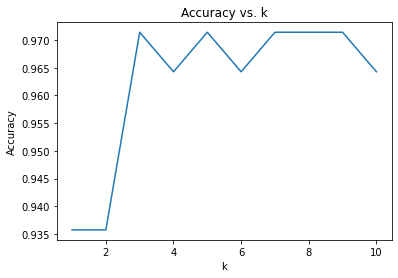

In [ ]:
import matplotlib.pyplot as plt

plt.plot(accuracy_knn.keys(), accuracy_knn.values())
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k')
plt.show()

#GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# define the parameter grid n= 1, 3, 5, 7, 9, 11, 13, 15, 17, 19
param_grid = {'n_neighbors': list(range(1, 20, 2)), 'weights': ['uniform', 'distance']}

# create a KNeighborsClassifier object
knn = KNeighborsClassifier()

# create a GridSearchCV object
grid = GridSearchCV(knn, param_grid, cv=5, verbose=0)

# fit the GridSearchCV object to the data
grid.fit(X_train, y_train)

# print the best hyperparameters and accuracy
print("Best parameters: {}".format(grid.best_params_))
print("Best accuracy: {:.2f}".format(grid.best_score_))

## best accuracy is k=15 with weight=uniform

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

Best parameters: {'n_neighbors': 15, 'weights': 'uniform'}
Best accuracy: 0.96


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

##Use k = 15 and weight = uniform

In [ ]:
knn = KNeighborsClassifier(n_neighbors=15, weights='uniform', p=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9714285714285714


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
